<a href="https://colab.research.google.com/github/reinaldolalujan/Practice-Portfolio/blob/main/Reinaldo%20Portfolio%20Project%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets
!pip install openai-whisper
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 24.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cac

In [2]:
def ETL():
    from datasets import load_dataset
    import pandas as pd
    import numpy as np

    # Load datasets and create a dataframe
    datasets = [load_dataset("PolyAI/minds14", lang, split='train') for lang in ['en-US', 'en-GB', 'en-AU']]
    dataset = pd.DataFrame([x for ds in datasets for x in ds if x is not None])

    # Map intent_class values to their corresponding labels
    intent_classes = ['abroad', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposit', 'direct_debit', 'freeze', 'high_value_payment', 'joint_account', 'latest_transactions', 'pay_bill']
    dataset['intent_class'] = dataset['intent_class'].map(dict(enumerate(intent_classes)))

    # Simplify the dataset
    dataset['audio_array'] = dataset['audio'].apply(lambda x: np.array(x['array']) if isinstance(x, dict) and 'array' in x else None)
    dataset['transcription_wordlength'] = dataset['transcription'].str.split().str.len()
    dataset['audioarray_length'] = dataset['audio_array'].apply(lambda x: x.size if x is not None else 0)
    dataset['transcription'] = dataset['transcription'].apply(lambda x: x.upper() if isinstance(x, str) else None)

    dataset.drop(columns=['path', 'english_transcription', 'lang_id'], inplace=True)
    dataset = dataset[['audio_array', 'transcription', 'transcription_wordlength', 'audioarray_length', 'intent_class']]

    return dataset

df = ETL()
df

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.w

Generating train split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

audio_array  \
0     [0.0, 0.000244140625, -0.000244140625, 0.0, -0...   
1     [0.0, 0.000244140625, 0.0, 0.0, 0.0, -0.000244...   
2     [0.0, 0.0, 0.0, 0.0, -0.000244140625, 0.0, 0.0...   
3     [0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4     [-0.000244140625, 0.0, -0.000244140625, 0.0, 0...   
...                                                 ...   
1804  [0.0, 0.0, 0.0, 0.0, 0.0, -0.000244140625, -0....   
1805  [0.0, 0.0, 0.0, 0.000244140625, 0.000244140625...   
1806  [0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0002441...   
1807  [0.0, 0.000244140625, 0.0, 0.0, -0.00024414062...   
1808  [0.0, 0.0, 0.0, 0.0, -0.000244140625, 0.000244...   

                                          transcription  \
0     I WOULD LIKE TO SET UP A JOINT ACCOUNT WITH MY...   
1     HENRY COUNTY SET UP A JOINT ACCOUNT WITH MY WI...   
2     HI I'D LIKE TO SET UP A JOINT ACCOUNT WITH MY ...   
3                        HOW DO I START A JOINT ACCOUNT   
4           CAN YOU HELP ME SET UP A JOINT BANK ACCOUNT   
...                                                 ...   
1804                                    I DEPOSIT MONEY   
1805              HOW DO I TRANSFER MONEY TO MY ACCOUNT   
1806          HOW CAN I TRANSFER MONEY INTO THE ACCOUNT   
1807  HI HELLO I'M TRYING TO FIND OUT HOW TO TRANSFE...   
1808           CAN I DEPOSIT MONEY INTO MY BANK ACCOUNT   

      transcription_wordlength  audioarray_length   intent_class  
0                           12              86699  joint_account  
1                           15              53248  joint_account  
2                           45             193877  joint_account  
3                            7              25941  joint_account  
4                           10              30720  joint_account  
...                        ...                ...            ...  
1804                         3              38638   cash_deposit  
1805                         8              28672   cash_deposit  
1806                         8              26006   cash_deposit  
1807                        15              61440   cash_deposit  
1808                         8              32768   cash_deposit  

[1809 rows x 5 columns]

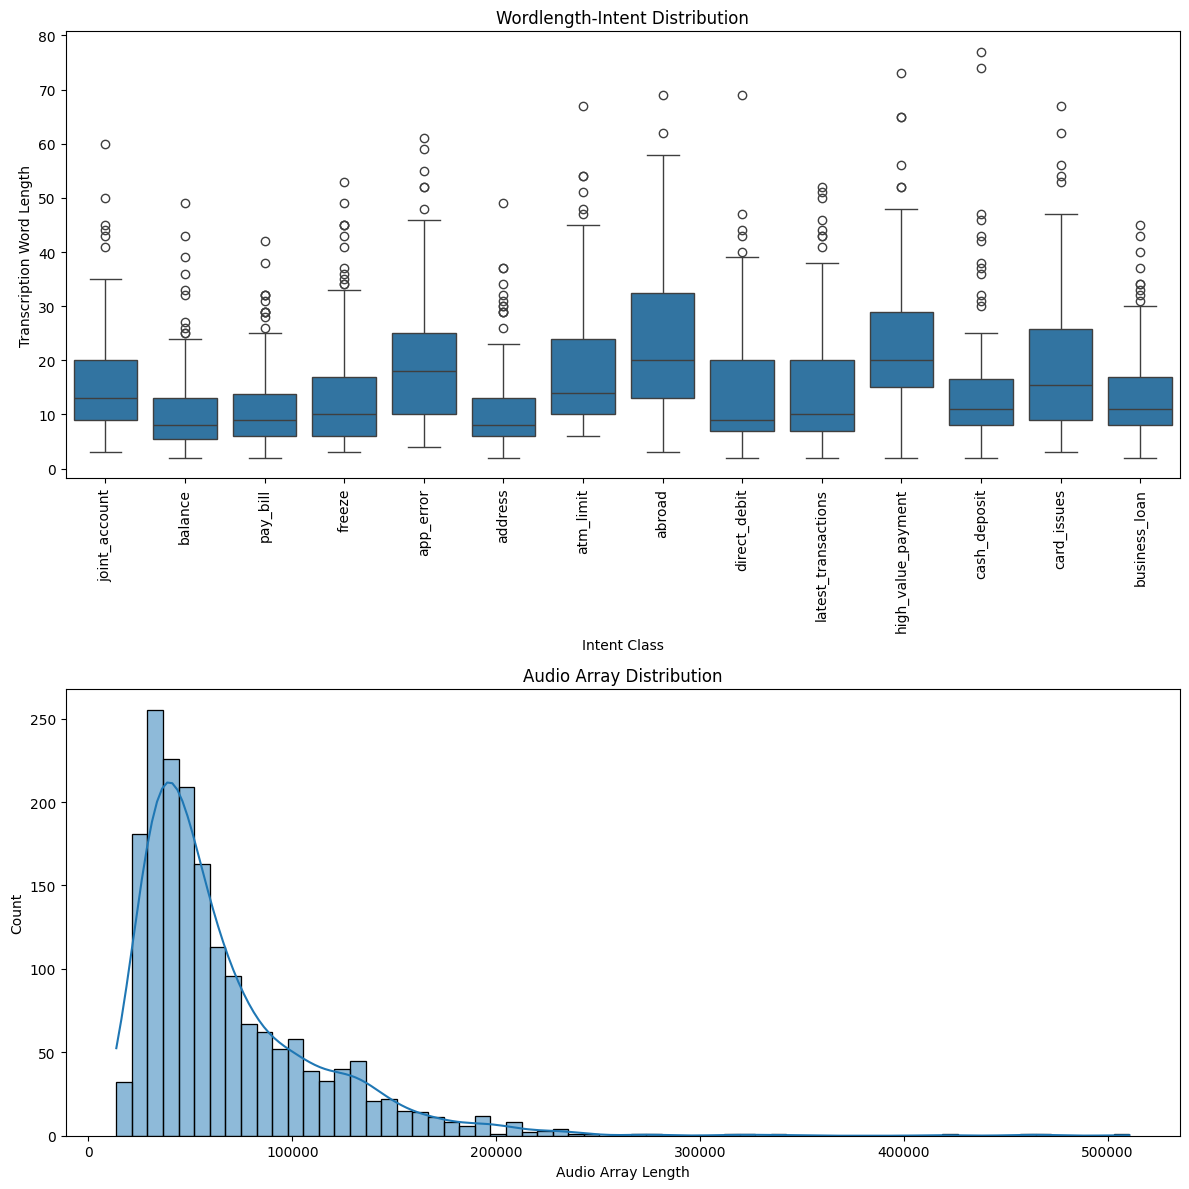

In [3]:
def plot_distribution():
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np

    fig, axs = plt.subplots(2, 1, figsize=(12, 12))

    # Intent-Wordlength
    sns.boxplot(x='intent_class', y='transcription_wordlength', data=df, ax=axs[0])
    axs[0].set_title('Wordlength-Intent Distribution')
    axs[0].set_xlabel('Intent Class')
    axs[0].set_ylabel('Transcription Word Length')
    axs[0].tick_params(axis='x', rotation=90)

    # Audio Array Length
    sns.histplot(df['audioarray_length'], kde=True, ax=axs[1])
    axs[1].set_title('Audio Array Distribution')
    axs[1].set_xlabel('Audio Array Length')

    plt.tight_layout()
    plt.show()

    print(f'Audio Array Mean:', np.mean(df['audioarray_length']))
    print(f'Audio Array Max Length:', np.max(df['audioarray_length']))
    print(f'Audio Array Difference:', np.max(df['audioarray_length']) - np.mean(df['audioarray_length']))

plot_distribution()

In [4]:
def data_sample(samplefile):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from IPython.display import Audio
    import librosa

    samplerate = 8000

    #Audio Sample
    audioplayer = Audio(data = samplefile, rate = samplerate)

    #Waveplot
    plt.figure(figsize=(12,6))
    plt.plot(samplefile)
    plt.title(f'Waveplot Exploratory for {samplefile}')
    plt.show()

    #Spectogram
    X = librosa.stft(samplefile)
    decible = librosa.amplitude_to_db(abs(X))

    fig, axs = plt.subplots(2, 1, figsize=(12, 12))

    img1 = librosa.display.specshow(decible, sr = samplerate, x_axis = 'time', y_axis = 'hz', ax=axs[0])
    axs[0].set_title(f'Spectogram Exploratory for {samplefile}')
    fig.colorbar(img1, ax=axs[0])

    #Spectogram Log
    img2 = librosa.display.specshow(decible, sr = samplerate, x_axis = 'time', y_axis = 'log', ax=axs[1])
    fig.colorbar(img2, ax=axs[1])
    axs[1].set_title(f'Spectogram Log Exploratory for {samplefile}')

    plt.tight_layout()
    plt.show()

    #Mel-Frequency Cepstral Coefficients (MFCCs)
    plt.figure(figsize=(12,6))
    mfccs = librosa.feature.mfcc(y = samplefile, sr = samplerate)
    librosa.display.specshow(mfccs, sr = samplerate, x_axis = 'time')
    plt.title(f'Mel-Frequency Cepstral Coefficients Exploratory for {samplefile}')
    plt.show()

    #Chroma
    plt.figure(figsize=(12,6))
    chroma = librosa.feature.chroma_stft(y = samplefile, sr = samplerate, hop_length = 12)
    librosa.display.specshow(chroma, x_axis = 'time', y_axis = 'chroma', hop_length = 12, cmap = 'coolwarm')
    plt.title(f'Chroma Exploratory For {samplefile}')
    plt.show()

    return audioplayer

Audio Array Mean: 67200.01271420675
Audio Array Max Length: 510635
Audio Array Difference: 443434.98728579324


In [5]:
df[df['audioarray_length'] == df['audioarray_length'].max()].index.values

array([816])

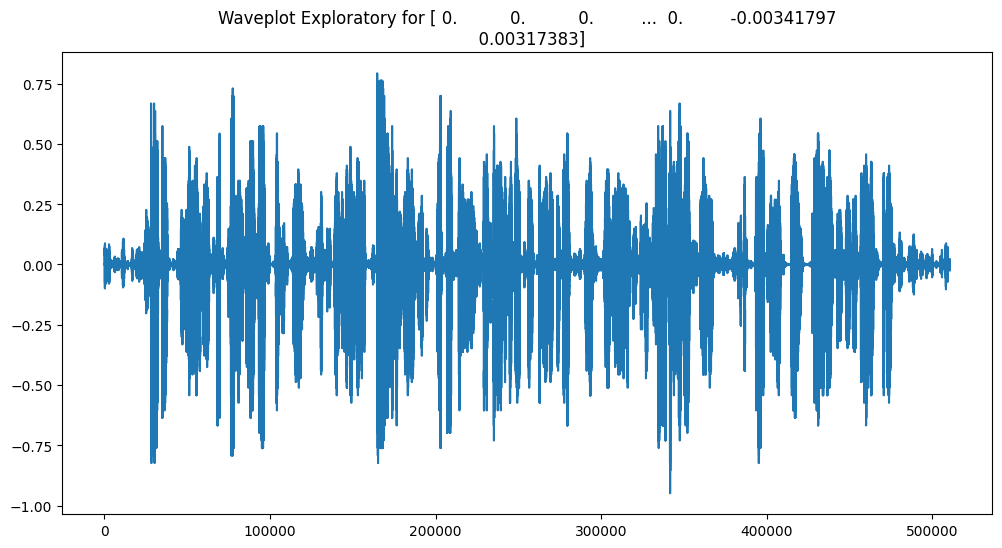

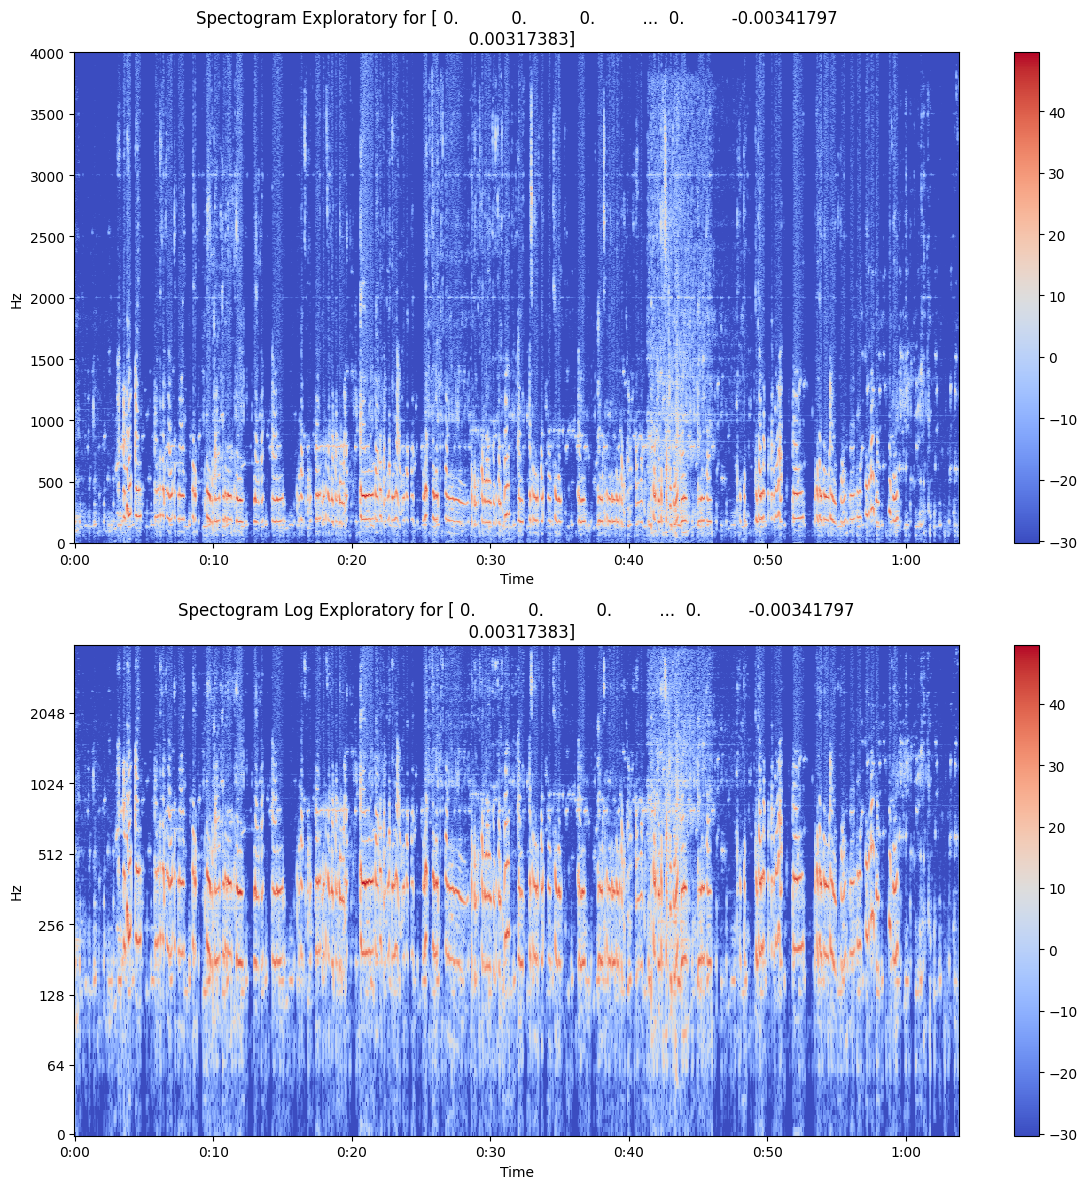

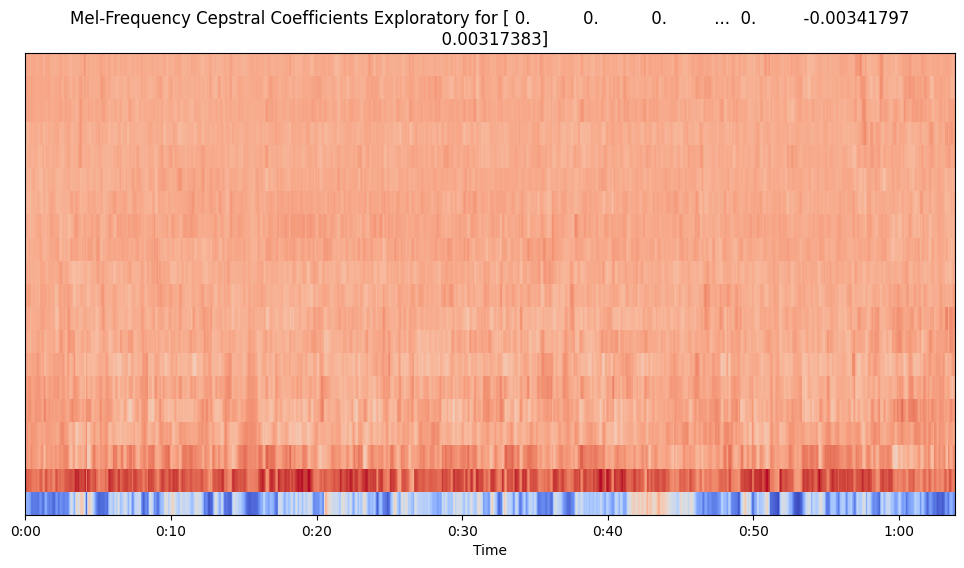

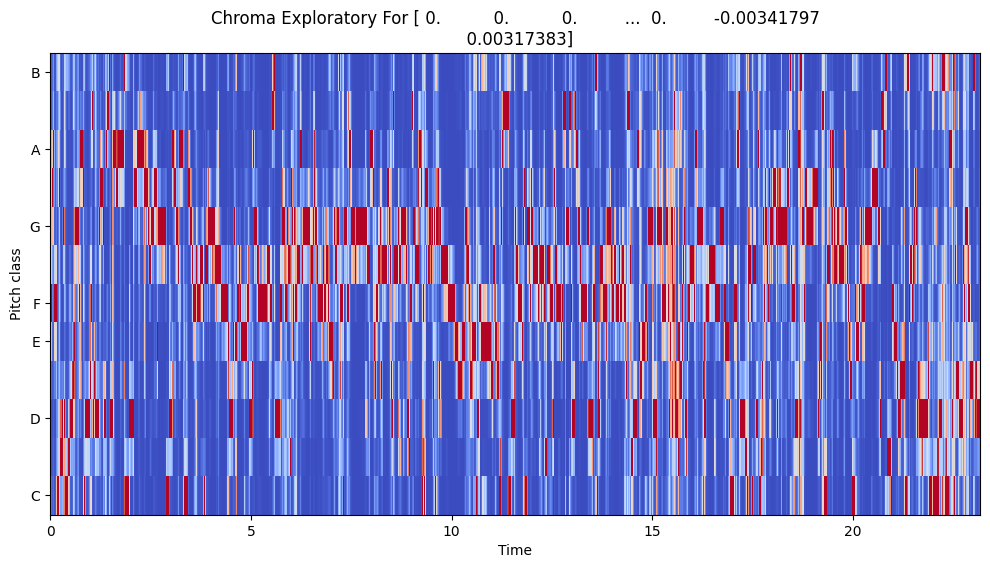

In [6]:
#Let's see the audio array with the maximum length
data_sample(df['audio_array'][816])

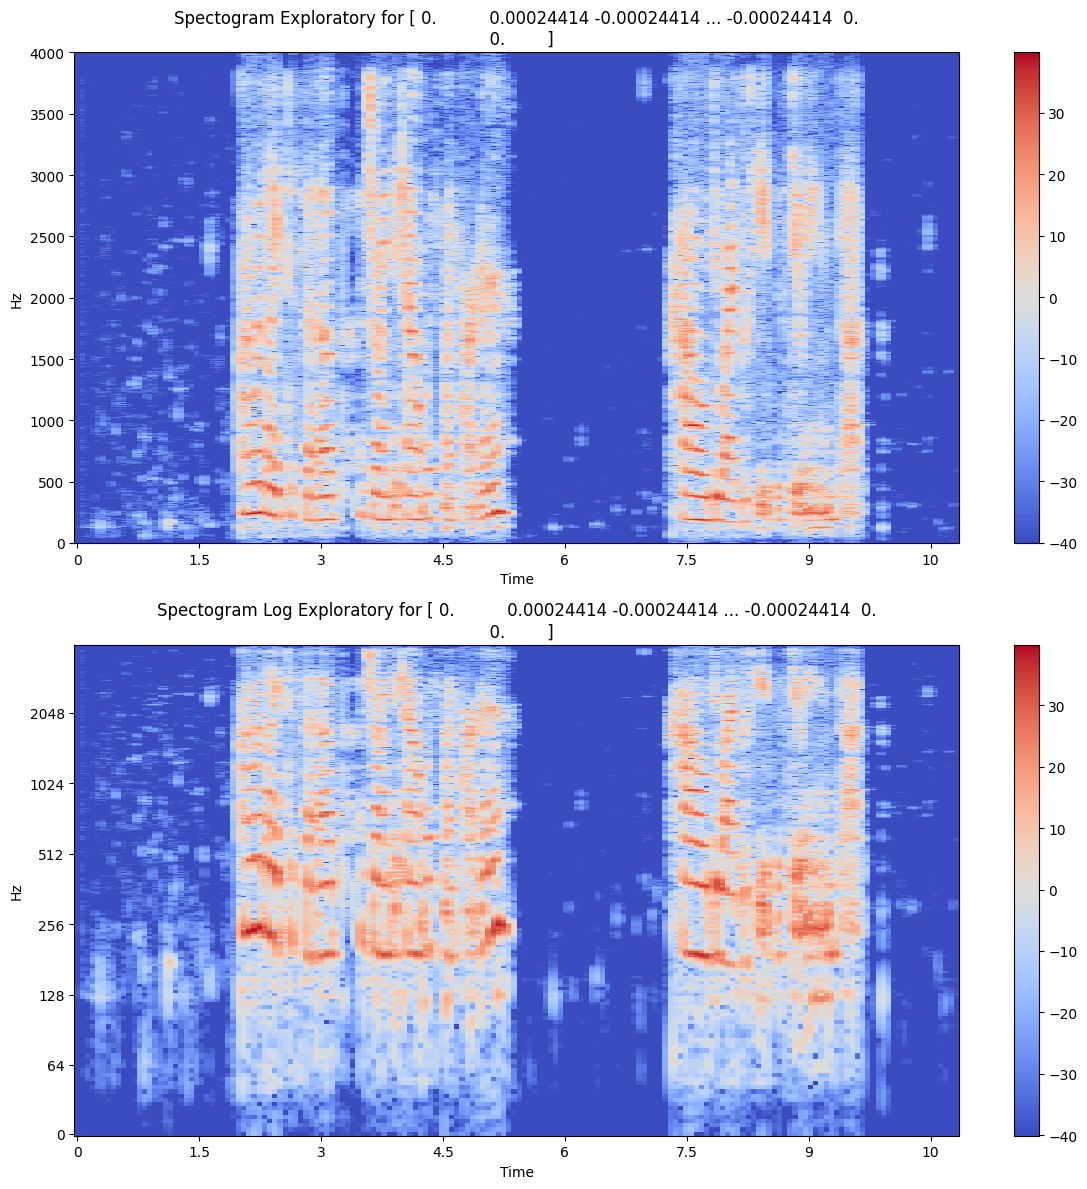

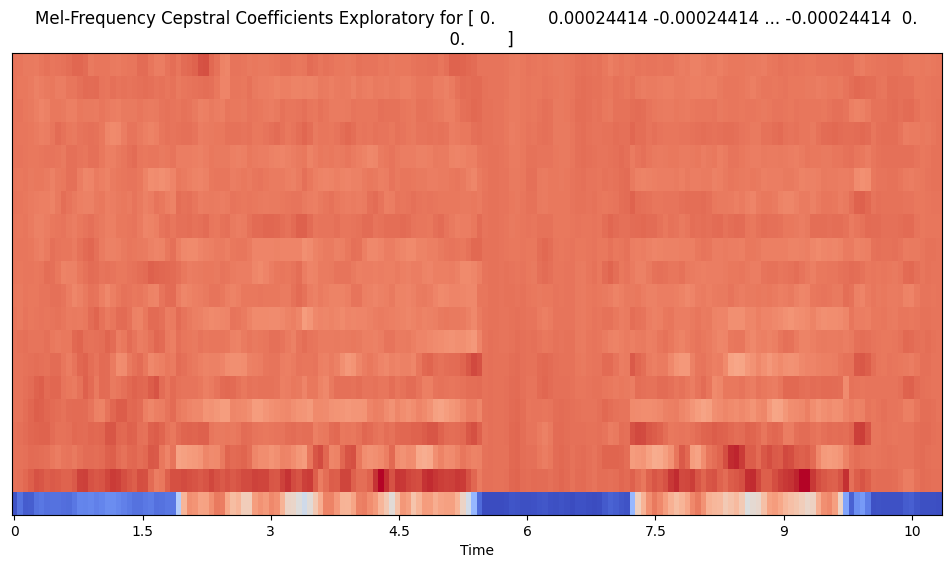

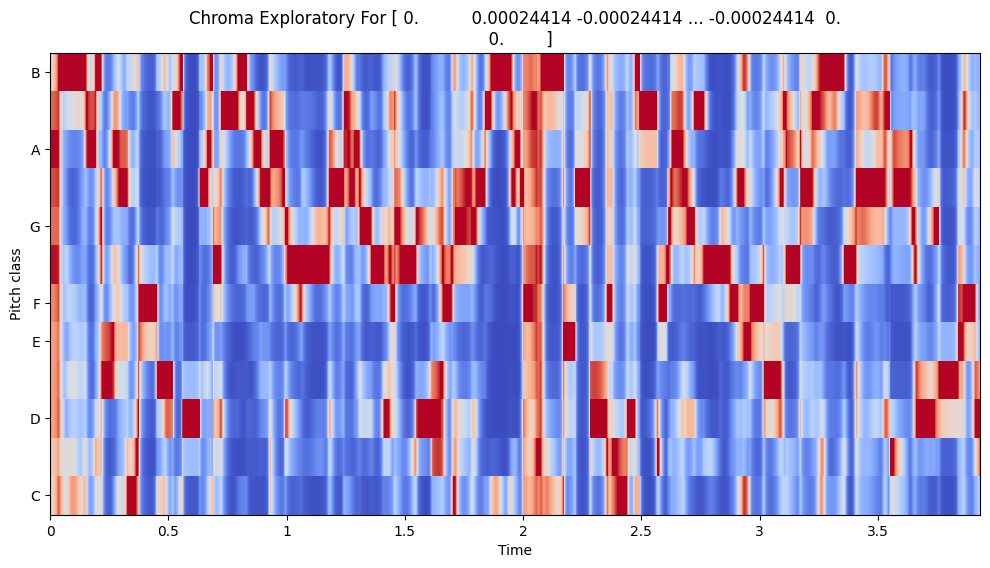

In [7]:
data_sample(df['audio_array'][0])

In [8]:
def random_sampling(df):
    import pandas as pd

    intent_classes = ['abroad', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposit', 'direct_debit', 'freeze', 'high_value_payment', 'joint_account', 'latest_transactions', 'pay_bill']

    #take 5 random sample for each intent_class where audioarray_length < 67200, the mean of audio_array
    samples = []
    for intent in intent_classes:
        samples.append(df[(df['intent_class'] == intent) & (df['audioarray_length'] < 67200)].sample(5))

    return pd.concat(samples)

In [9]:
predict_data = random_sampling(df)
predict_data

audio_array  \
316   [0.0, 0.0, -0.000244140625, 0.0, 0.0, 0.0, 0.0...   
1424  [-0.000244140625, -0.000244140625, -0.00024414...   
793   [0.0, 0.0, 0.000244140625, 0.000244140625, 0.0...   
1421  [0.000244140625, 0.000244140625, 0.00024414062...   
1419  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...                                                 ...   
1164  [0.0, 0.0, 0.0, -0.000244140625, 0.0, 0.0, 0.0...   
1203  [0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0,...   
585   [0.0, -0.000244140625, 0.0, 0.000244140625, 0....   
1198  [0.0, 0.0, -0.000244140625, 0.0, 0.0, 0.000244...   
95    [0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0,...   

                                          transcription  \
316   OH YES I'M GOING TO JAPAN FOR A COUPLE OF WEEK...   
1424                      I WANTED TO CHANGE MY ADDRESS   
793   HELLO I'M JUST WONDERING WHETHER MY CARD WOULD...   
1421                     NEED TO GET SOME TRAVEL ADVICE   
1419      I NEED TO USE MY CARD WHEN I'M GOING OVERSEAS   
...                                                 ...   
1164                            ID LIKE TO PAY THE BILL   
1203                 ID LIKE TO PAY MY CREDIT CARD BILL   
585                            I NEED TO MAKE A PAYMENT   
1198     I WOULD LIKE TO PAY MY CREDIT CARD BILL PLEASE   
95                       I WOULD LIKE TO MAKE A PAYMENT   

      transcription_wordlength  audioarray_length intent_class  
316                         24              62123       abroad  
1424                         6              33920       abroad  
793                         10              53499       abroad  
1421                         6              32800       abroad  
1419                        10              54240       abroad  
...                        ...                ...          ...  
1164                         6              15701     pay_bill  
1203                         8              25941     pay_bill  
585                          6              26749     pay_bill  
1198                        10              36864     pay_bill  
95                           7              17749     pay_bill  

[70 rows x 5 columns]

In [10]:
def transcribe_audio(audio_data):
  import pandas as pd
  import whisper
  import numpy as np
  import torch

  model = whisper.load_model("tiny")
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # Ensure audio_data is a numpy array of type float32
  audio_data = np.asarray(audio_data, dtype=np.float32)
  audio_data = whisper.pad_or_trim(audio_data)

  # Ensure the audio is mono
  if audio_data.ndim > 1:
    audio_data = np.mean(audio_data, axis=1)

  mel = whisper.log_mel_spectrogram(audio_data).to(model.device)
  options = whisper.DecodingOptions()
  result = whisper.decode(model, mel, options)

  return result.text

In [11]:
def evaluate_wer(true_transcriptions, generated_transcriptions):
    import jiwer

    # Ensure inputs are lists of strings
    true_transcriptions = [str(x) for x in true_transcriptions]
    generated_transcriptions = [str(x['text']) if isinstance(x, dict) and 'text' in x else str(x) for x in generated_transcriptions]

    # Define the transformation for both truth and hypothesis
    transforms = jiwer.Compose([
        jiwer.ExpandCommonEnglishContractions(),
        jiwer.RemoveEmptyStrings(),
        jiwer.ToLowerCase(),
        jiwer.RemoveMultipleSpaces(),
        jiwer.Strip(),
        jiwer.RemovePunctuation(),
        jiwer.ReduceToListOfListOfWords(),
    ])

    # Initialize metrics
    wer_scores, cer_scores, error_sentences = [], [], 0

    # Iterate over pairs of true and generated transcriptions
    for true_text, gen_text in zip(true_transcriptions, generated_transcriptions):
        # Calculate WER and CER
        wer_score = jiwer.wer(true_text, gen_text, truth_transform=transforms, hypothesis_transform=transforms)
        cer_score = jiwer.cer(true_text, gen_text)

        wer_scores.append(wer_score)
        cer_scores.append(cer_score)

        # Increment error_sentences if true_text does not match gen_text
        if true_text != gen_text:
            error_sentences += 1

    # Calculate averages
    avg_wer = sum(wer_scores) / len(wer_scores) if wer_scores else 0
    avg_cer = sum(cer_scores) / len(cer_scores) if cer_scores else 0
    avg_ser = error_sentences / len(true_transcriptions) if true_transcriptions else 0
    avg_acc = (1 - avg_wer) * 100

    return avg_wer, avg_cer, avg_ser, avg_acc

In [12]:
predict_data['prediction'] = predict_data['audio_array'].apply(lambda x: transcribe_audio(x))
avg_wer, avg_cer, avg_ser, avg_acc = evaluate_wer(predict_data['transcription'], predict_data['prediction'])

100%|██████████████████████████████████████| 72.1M/72.1M [00:00<00:00, 129MiB/s]


In [15]:
predict_data[['transcription', 'prediction']]

transcription  \
316   OH YES I'M GOING TO JAPAN FOR A COUPLE OF WEEK...   
1424                      I WANTED TO CHANGE MY ADDRESS   
793   HELLO I'M JUST WONDERING WHETHER MY CARD WOULD...   
1421                     NEED TO GET SOME TRAVEL ADVICE   
1419      I NEED TO USE MY CARD WHEN I'M GOING OVERSEAS   
...                                                 ...   
1164                            ID LIKE TO PAY THE BILL   
1203                 ID LIKE TO PAY MY CREDIT CARD BILL   
585                            I NEED TO MAKE A PAYMENT   
1198     I WOULD LIKE TO PAY MY CREDIT CARD BILL PLEASE   
95                       I WOULD LIKE TO MAKE A PAYMENT   

                                             prediction  
316   I'm going to try to do something. I'm going to...  
1424                              Have a good day, bye.  
793                I'm gonna pull up a little bit more.  
1421                                         Thank you.  
1419  I'm a little bit tired, but I'm not a little b...  
...                                                 ...  
1164                                         あ、あ、あ、どうだ!  
1203                             Rack the little catar!  
585                      I hope you have a good moment.  
1198                         I'll talk to Kalapeka.com.  
95                              I'll see you next time.  

[70 rows x 2 columns]

In [16]:
print(avg_wer, avg_cer, avg_ser, avg_acc)

0.9742904376202693 0.9995274766554382 1.0 2.5709562379730655
